In [1]:
!nvidia-smi

Thu Feb 10 14:18:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import pandas as pd

import pathlib

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions

from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
dataset_url = "/content/961791-Deep_learn"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar=True)

dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir, image_size=(180, 180), batch_size=64)

print(type(dataset))

In [ ]:
BATCH_SIZE = 32
EPOCH = 5

In [3]:
!unzip crack.zip

Archive:  crack.zip
 extracting: crack/.DS_Store         
 extracting: crack/001.jpg           
 extracting: crack/002.jpg           
 extracting: crack/003.jpg           
 extracting: crack/004.jpg           
 extracting: crack/005.jpg           
 extracting: crack/006.jpg           
 extracting: crack/007.jpg           
 extracting: crack/008.jpg           
 extracting: crack/009.jpg           
 extracting: crack/010.jpg           
 extracting: crack/011.jpg           
 extracting: crack/012.jpg           
 extracting: crack/013.jpg           
 extracting: crack/014.jpg           
 extracting: crack/015.jpg           
 extracting: crack/016.jpg           
 extracting: crack/017.jpg           
 extracting: crack/018.jpg           
 extracting: crack/019.jpg           
 extracting: crack/020.jpg           
 extracting: crack/021.jpg           
 extracting: crack/022.jpg           
 extracting: crack/023.jpg           
 extracting: crack/024.jpg           
 extracting: crack/025.jpg    

In [4]:
!unzip non-crack.zip

Archive:  non-crack.zip
 extracting: non-crack/202.jpg       
 extracting: non-crack/203.jpg       
 extracting: non-crack/204.jpg       
 extracting: non-crack/205.jpg       
 extracting: non-crack/206.jpg       
 extracting: non-crack/207.jpg       
 extracting: non-crack/208.jpg       


You should see a new folder *drive* in the *Files* tab. If not, click *Refresh*




In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/961791-Deep_learn/002.jpg")

In [ ]:
from PIL import Image

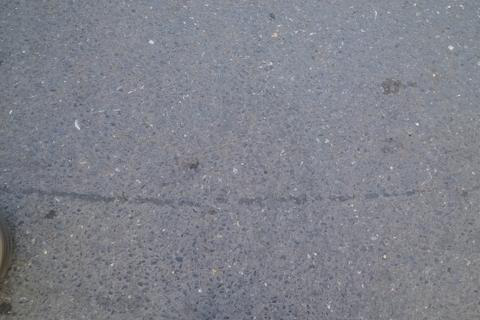

In [ ]:
import glob
image_list = []
for filename in glob.glob('/content/961791-Deep_learn/*.jpg'): 
    im=Image.open(filename)
    image_list.append(im)
image_list[1]

In [ ]:
import_data = glob.glob('/content/961791-Deep_learn/*.jpg')
data = []
labels = []
for i in import_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgba', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(0)
data = np.array(data)
labels = np.array(labels)
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data,labels, test_size=0.2,
                                                random_state=42)

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(image_list, test_size=0.2,
                                                random_state=42)

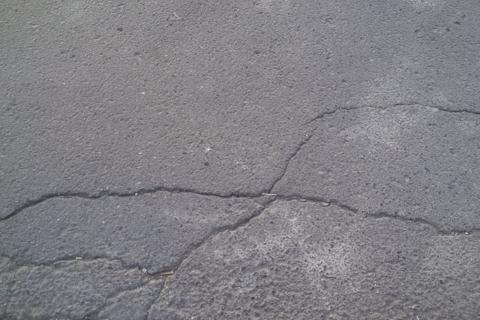

In [ ]:
cv2_imshow(img)



Add a short name and description for the network.

*   The short name will be used to identify the network and construct the output save directory.
*   The description can be a more in-depth summary of the network and dataset. Set to *None* to have the description automatically generated.




In [ ]:
params['name'] = 'google_colab_example'
params['description'] = None

### 2. Input Source

Configure the location of the training set according to the method used to upload previously:

**Zip file on Dropbox / OneDrive / OwnCloud / Nuage etc.:**

Set the `input` parameter as the direct download link URL. (The training script will download the file and unzip it to a directory when run). Enclose the address with quotes and with `r` at the front. For example:

`params['input_source'] = r'https://nuage.osupytheas.fr/s/crYrKyXdQqAR5E6/download'`

**Folder on Google Drive**

Use the path to the folder on Google Drive. To easily get the path, navigate to the base folder of the dataset in the *Files* tab, right-click the folder and select *Copy Path*. For example:

`params['input_source'] = r'/content/drive/My Drive/datasets/DATASET_NAME'`

**Folder transferred from computer**

Use the path to the folder.

In [ ]:
# Uncomment (remove the hash symbol) the line corresponding to the method used:

# Zip file from cloud storage:
params['input_source'] = r'https://1drv.ws/u/s!AiQM7sVIv7fah4MN2gWCXDWX_DT0OA?e=Eu3lZh'

# Folder on Google Drive
# params['input_source'] = r'/content/datasets/DATASET_NAME'

# Folder transferred from computer
# params['input_source'] = r'/content/drive/My Drive/datasets/DATASET_NAME'

### 3. Input Options

Other input parameters are:

#### Minimum count per class

For training to work well there should be a minimum number of examples in each class. We recommend at least 40, and ideally 200, but it depends on how variable the images are in the dataset. Setting `data_min_count` excludes any classes which have fewer than that many images.

If desired, the images from classes with less than `data_min_count` examples can be collected into a single _others_ class by setting `data_map_others` to `True`.

#### Test / train split

A random proportion of the dataset is set aside for testing / validation. That is, it is not used in training and is instead used to evaluate the accuracy of the network. The proportion of test images is usually around 20% and is set with `data_split`. The split between test and train is normally random, but you can set the random `seed` to an integer ensure the same random ordering is used if necessary.

When using N-fold cross-validation we can also set `data_split_offset`. This chooses the fold that is used in training. E.g. if the split is 0.2 (20%) then we may select 0, 1, 2, 3, or 4 to use the respective 20% as the test data.

We do NOT use a validation set, training is stopped based on training loss!

#### Class weights

If the dataset is heavily unbalanced with lots of images in only a few classes, training may give good accuracy on those classes at the expense of accuracy for the classes with few images. To account for this, we can weight the importance of the classes according to their counts by settings `use_class_weights` to `True`

In [ ]:
params['data_min_count'] = 40
params['data_map_others'] = False

params['data_split'] = 0.20
params['data_split_offset'] = 0
params['seed'] = None

params['use_class_weights'] = True

### 4. Output Location

The output location specifies where the training results (trained CNN model, graphs, etc) will be saved on Google Colab.

You can save them in the Google Colab:

`params['output_dir'] = r'/content/output/'`

Or in your Google Drive folder, e.g.:

`params['output_dir'] = r'/content/drive/My Drive/output/'`

Saving to Google Drive has the advantage that the results will be synced to your computer automatically if you have Google Drive installed.

In [ ]:
# Save to Google Colab:
params['output_dir'] = r'/content/output/'

# Save to Google Drive
# params['output_dir'] = r'/content/drive/My Drive/output/

**Note:** For Google Drive, if you have not already done so, the drive must be mounted on Google Colab but running the following cell and entering the code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 5. Output Options

#### Model Format

There are three option to save the model (trained network) using the `save_model` parameter:

*  `None`: Don't save the model
*  `saved_model`: Save the model in Tensorflow saved model format
*  `frozen`: Freeze and save the model **(recommended)**

The `frozen`method is recommended so that the trained network can be used in the *ParticleTrieur* program. Models can be quite large (20 - 100MB depending on type).

#### Estimate mislabeled

If enabled, mislabeled images in the training (and test) dataset are estimated by using k-NN to compare the CNN feature vector (output of penultimate dense layer) with other images, and flagging those images where the more similar images belong to a different class. 

E.g. if the image is labeled in class A but the more similar images are in class B, it will be flagged as mislabeled. A figure is generated for each potentially mislabeled image in the output directory. Set `save_mislabeled` to `True` to enable this.

In [ ]:
params['save_model'] = 'frozen'
params['save_mislabeled'] = True

### 6. Convolutional Neural Network

The type of convolutional neural network determines the accuracy of classification, the time to finish training and the size of the network files.

We recommend starting with the `resnet50_cyclic_tl` network to get an idea of the rough accuracy for your dataset and to check that everything is running correctly.

The types available are:

#### Base / ResNet Cyclic (Custom)

Codes: `base_cyclic, resnet_cyclic`

These CNNs was developed at CEREGE for using with foraminifera particle images. The `base_cyclic` design uses blocks of two convolutional layers, while the `resnet_cyclic` design uses ResNet-style blocks. 

They include *cyclic layers* that give some rotational invariance internal to the network. The recommened input is greyscale images (single channel) with size 128 x 128 pixels.

The networks also has some extra parameters:

*   `filters`: Number of filters in the first convolution layer (default: 4)
*   `use_batch_norm`: Use batch norm layers (default: True)
*   `global_pooling`: Use average (`avg`), maximum (`max`) or no global pooling layer (`None`) (default: None)
*   `activation`: Use ReLU (`relu`), ELU (`elu`) or SeLU (`selu`) for the activation function (default: relu)

#### Transfer Learning (Fast)

Codes: `resnet50_tl, resnet50_cyclic_tl, resnet50_cyclic_gain_tl`

This uses a ResNet50 network that has been pre-trained on ImageNet to generate feature vectors which are then trained in a two-layer flat network. It is almost as accurate as the previous network types but much much faster to train. 

The cost of the increased speed is that no image augmentation is performed. The cyclic and gain variants add some internal variation to the network to compensate, using cylic layers and random gain layers before the ResNet50 model, respectively.

#### Pre-constructed (Keras Applications)

The MISO library includes the classification_models library from https://github.com/qubvel/classification_models

You can use any of the models described in the above link (which includes accuracy and running times for the ImageNet training set): `vgg16, vgg19, resnet18, resnet34, resnet50, resnet101, resnet152, resnet50v2, resnet101v2, resnet152v2, resnext50, resnext101, densenet121, densenet169, densenet201, inceptionv3, xception, inceptionresnetv2, seresnet18, seresnet34, seresnet50, seresnet101, seresnet152, seresnext50, seresnext101, senet154, nasnetlarge, nasnetmobile, mobilenet, mobilenetv2`.

The image size and type (colour or grayscale) are also described. Most of these networks are designed for very large training sets with lots of classes, and therefore take a long time to train. We recommend trying these networks as a first step:

*    `resnet18`: ResNet-style network with 18 layers. ResNet networks use skip connections to help propogate small features to the deeper layers.
*    `seresnet18`: Same as `resnet18` but with squeeze excitation layers
*    `densenet121`: DenseNet-style network with 121 layers. DenseNet network use lots of layers with only a small number of filters, where every layer is connected to the layers following it, inside a block.
*    `mobilenetv2`: A small, accurate network that is fast to train.

These four designs use 224 x 224 images, however we have found that larger images may give better results. Either colour or grayscale can be used.

#### Image Size

Finally, the image size must be selected.

Choose the appropriate width and height (these must be the same!) and number of channels, 1 for grayscale, 3 for colour

In [ ]:
params['type'] = 'resnet50_cyclic_tl'
params['img_height'] = 224
params['img_width'] = 224
params['img_channels'] = 3

# Custom parameters for base_cyclic and resnet_cyclic
params['filters'] = 4
params['use_batch_norm'] = True
params['global_pooling'] = None
params['activation'] = 'relu'

### 7. Training

#### Batch size

A default batch size of 64 is used for training. The batch size can be reduced if there are out-of-memory errors, however this should not be a problem on Google Colab.

#### Adaptive learning rate (ALR)

When training the network, the learning rate (how rapidly the network weights are allowed to change) is dropped by half whenever the improvement in loss (how well the network fits the training data) reaches a plateau. The plateau is detected by looking at the loss over the most recent number of epochs. Training is stopped after this plateau is reached a certain number of times.

This adaptive learning rate system is controlled by two parameters:

*   `alr_epochs`: The number of epochs (complete runs through the training data) to consider when detecting the plateau.
*   `alr_drops`: The number of times the learning rate is dropped (plateau detected) after which training is stopped.

A larger `alr_epochs` will result in better accuracy but longer training time, with diminishing returns. From experience we have found that a value of 40 works well for datasets with about 200 images per class, and 5-10 for large datasets with 1000+ images per class.

#### Maximum limit

There is another parameter `max_drops` that sets the maximum number of epochs after which training will be stopped regardless. Typically we set this to a high number, as the ALR system will usually stop training before this is reached. However, you can also set it to a very small number, e.g. 2, to quickly run the training just to check everything is working, before set back to a high number, e.g. 10000, for proper training.



In [ ]:
params['batch_size'] = 64
params['alr_epochs'] = 40
params['alr_drops'] = 4
params['max_epochs'] = 10000

## Execution

Now that the parameters have been configured, run the cell below to start training!

The output will show, in order:

*   Loading of the images and if any classes have been skipped due to too few images.
*   The topography of the network (layers and dimensions).
*   A text-based graph showing the progress of training in real-time.
*   Loss and accuracy graphs.
*   Confusion matrix with precision and recall bar graphs.

Training can take a long time depending on the type of network, size of the dataset and number of ALR epochs.

In [ ]:
model, vector_model, datasource, result = train_image_classification_model(params)

***

***


# Results

The results of training are saved in the output folder, under the network name and the date and time of training.

## Saved Files

###Model

The model folder contains two versions of the saved model.

*   `saved_model.pb` and the `variables` directory contain the model saved in Tensorflow Saver format.
*   `frozen_model.pb` is the model that has been frozen and is ready for use in classification programs.
*   `network_info.xml` is an XML description of the frozen model that describes the structure of the model (e.g. which tensors are used for input and output) and the class labels.

###Mislabeled

The *Mislabeled* directory contains some plots showing images that may have been mislabeled when creating the dataset.

It does this by generating a *feature vector* from the output the second-last dense layer of the network, for each image. The vectors are compared using k-NN for each image. If the class of image predicted using k-NN is different to the label given to the image it is flagged as possibly mislabeled.

###Downloading

Each file can be downloaded individually from the output folder.

If you want to download all files at once, create a zip of the folder:

*   Locate the folder containing the output files in the *Files* tab.
*   Right-click on it and select *Copy Path*.
*   Paste the path in the cell below and run it.
*   Right-click *output.zip* and select *Download*

In [ ]:
!zip -r /content/output.zip PAST_PATH_HERE


## Python output

The training function also returns python variables that can be used for further inference

*   `model`: The trained Keras model.
*  `vector_model`: Sub-model of the trained model that outputs the feature vector.
*   `datasource`: The training and test images and class labels.
*   `result`: The results of training: accuracy and per-class precision and recall.

Run the cell below to print the attributes of each object:

In [ ]:
def print_attributes(obj, name):
  print("---------------------------------------------------------------------")
  print(name + ":")
  print("---------------------------------------------------------------------")
  print("\n".join([attr for attr in dir(obj) if not attr.startswith('__')]))
  print()
  
print_attributes(result, "result")
print_attributes(datasource, "datasource")